# **Importing the neccessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the Dataset**

In [ ]:
df=pd.read_csv('content/zomato.csv')
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.shape

(51717, 17)

# **Removing unneccessary columns**

In [ ]:
df.drop(columns=['url','address','phone','menu_item','dish_liked','reviews_list'],axis=1,inplace=True)
df.duplicated().sum()



108

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

In [ ]:
df.rename(columns={'approx_cost(for two people)':'price4two','listed_in(type)':'type'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             51609 non-null  object
 1   online_order     51609 non-null  object
 2   book_table       51609 non-null  object
 3   rate             43854 non-null  object
 4   votes            51609 non-null  int64 
 5   location         51588 non-null  object
 6   rest_type        51382 non-null  object
 7   cuisines         51564 non-null  object
 8   price4two        51265 non-null  object
 9   type             51609 non-null  object
 10  listed_in(city)  51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


In [ ]:
df.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,7755
votes,0
location,21
rest_type,227
cuisines,45
price4two,344
type,0


# **Inferences:**


*   There are more null values in dataframe
*   example = rate,location,rest_type,dish_liked,cuisines,price4two





# **Handling the rate columns**

In [ ]:
df['rate'].unique()
#there are '/5','NEW','-'

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
def clean_rate(value):
  if value=='NEW' or value=="-":
    return np.nan
  else:
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(clean_rate)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,price4two,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
df['rate'].fillna(df['rate'].mean(),inplace=True)
df.head()
df.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,21
rest_type,227
cuisines,45
price4two,344
type,0


In [ ]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51609 non-null  object 
 1   online_order     51609 non-null  object 
 2   book_table       51609 non-null  object 
 3   rate             51609 non-null  float64
 4   votes            51609 non-null  int64  
 5   location         51588 non-null  object 
 6   rest_type        51382 non-null  object 
 7   cuisines         51564 non-null  object 
 8   price4two        51265 non-null  object 
 9   type             51609 non-null  object 
 10  listed_in(city)  51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,price4two,type,listed_in(city)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51609 non-null  object 
 1   online_order     51609 non-null  object 
 2   book_table       51609 non-null  object 
 3   rate             51609 non-null  float64
 4   votes            51609 non-null  int64  
 5   location         51588 non-null  object 
 6   rest_type        51382 non-null  object 
 7   cuisines         51564 non-null  object 
 8   price4two        51265 non-null  object 
 9   type             51609 non-null  object 
 10  listed_in(city)  51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51042 non-null  object 
 1   online_order     51042 non-null  object 
 2   book_table       51042 non-null  object 
 3   rate             51042 non-null  float64
 4   votes            51042 non-null  int64  
 5   location         51042 non-null  object 
 6   rest_type        51042 non-null  object 
 7   cuisines         51042 non-null  object 
 8   price4two        51042 non-null  object 
 9   type             51042 non-null  object 
 10  listed_in(city)  51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


# **Handling the Location column**

In [ ]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [ ]:
location_count=df['location'].value_counts()

# **Inferences:**
We can drop the dish_liked column as its missing most of the values and its not so critical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51042 non-null  object 
 1   online_order     51042 non-null  object 
 2   book_table       51042 non-null  object 
 3   rate             51042 non-null  float64
 4   votes            51042 non-null  int64  
 5   location         51042 non-null  object 
 6   rest_type        51042 non-null  object 
 7   cuisines         51042 non-null  object 
 8   price4two        51042 non-null  object 
 9   type             51042 non-null  object 
 10  listed_in(city)  51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [ ]:
df['location'].value_counts()
location_count=location_count[location_count<300]
location_count
def clean_location(value):
  if value in location_count:
    return 'others'
  else:
    return value
df['location']=df['location'].apply(clean_location)
df['location'].value_counts()

,count
location,
BTM,5056
others,4954
HSR,2494
Koramangala 5th Block,2479
JP Nagar,2218
Whitefield,2105
Indiranagar,2026
Jayanagar,1916
Marathahalli,1805


# **Handling the rest_type column**

In [ ]:
rest_type_count=df['rest_type'].value_counts()
rest_type_count=rest_type_count[rest_type_count<1000]
rest_type_count
def clean_rest_type(value):
  if value in rest_type_count:
    return 'others'
  else:
    return value
df['rest_type']=df['rest_type'].apply(clean_rest_type)
df['rest_type'].value_counts()



,count
rest_type,
Quick Bites,19010
Casual Dining,10253
others,9003
Cafe,3682
Delivery,2574
Dessert Parlor,2242
"Takeaway, Delivery",2008
Bakery,1140
"Casual Dining, Bar",1130


# **Handling the cuisines columns**

In [ ]:
cuisines_custom=df['cuisines'].value_counts()
cuisines_custom=cuisines_custom[cuisines_custom<100]
cuisines_custom
def clean_cuisines(value):
  if value in cuisines_custom:
    return 'others'
  else:
    return value
df['cuisines']=df['cuisines'].apply(clean_cuisines)
df['cuisines'].value_counts()


,count
cuisines,
others,26159
North Indian,2852
"North Indian, Chinese",2351
South Indian,1820
Biryani,903
"Bakery, Desserts",898
Fast Food,796
Desserts,754
Cafe,725


# **Handling the price4two**

In [ ]:
#df['price4two'].unique()
price_counts=df['price4two'].value_counts()
def clean_price(value):
  if ',' in str(value):
    value=value.replace(',','')
    return value
  else:
    return value
df['price4two']=df['price4two'].apply(clean_price)

In [ ]:
df.shape

(51042, 11)

# **Inferences:**

*   all the values are now cleaned
*   but some contains null values we can drop them
*   we drop the duplicate values




In [ ]:
df.dropna(inplace=True)
df.isna().sum()


,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
cuisines,0
price4two,0
type,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51042 non-null  object 
 1   online_order     51042 non-null  object 
 2   book_table       51042 non-null  object 
 3   rate             51042 non-null  float64
 4   votes            51042 non-null  int64  
 5   location         51042 non-null  object 
 6   rest_type        51042 non-null  object 
 7   cuisines         51042 non-null  object 
 8   price4two        51042 non-null  object 
 9   type             51042 non-null  object 
 10  listed_in(city)  51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [ ]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,price4two,type,listed_in(city)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,others,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,others,others,800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,others,600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,others,Continental,1500,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,others,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,others,Finger Food,2000,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,others,others,Finger Food,2500,Pubs and bars,Whitefield


# **DATA VISUALIZATION**

In [ ]:
df['location'].value_counts()

,count
location,
BTM,5056
others,4954
HSR,2494
Koramangala 5th Block,2479
JP Nagar,2218
Whitefield,2105
Indiranagar,2026
Jayanagar,1916
Marathahalli,1805


In [ ]:
city_names=df['location'].value_counts().index
city_names
city_counts=df['location'].value_counts().values
city_counts

array([5056, 4954, 2494, 2479, 2218, 2105, 2026, 1916, 1805, 1609, 1268,
       1246, 1236, 1210, 1174, 1127, 1047, 1017, 1011,  902,  893,  841,
        803,  721,  714,  684,  671,  656,  644,  640,  639,  591,  566,
        518,  508,  498,  490,  482,  437,  433,  370,  343])

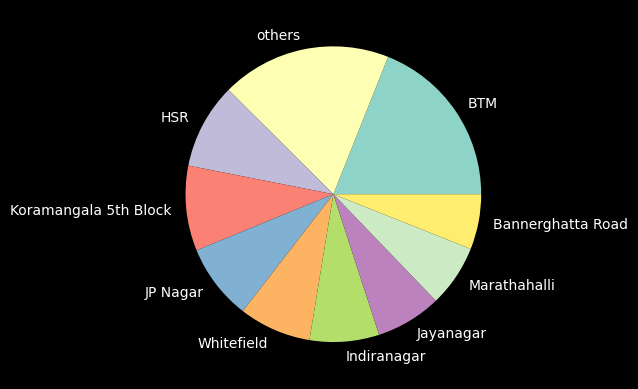

In [ ]:
plt.style.use('dark_background')
plt.pie(city_counts[:10],labels=city_names[:10])
plt.show()

In [ ]:
df1 = df.groupby(['location','rest_type'])['rest_type'].count()
df1.to_csv('df1.csv')
df1 = pd.read_csv('df1.csv')
df1 = pd.pivot_table(df1, values='rest_type', index=['location'], columns=['rest_type'], aggfunc=np.sum)
df1.head()

<ipython-input-31-79003bdb39b4>:4: FutureWarning: The provided callable <function sum at 0x7a4c8a712dd0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1, values='rest_type', index=['location'], columns=['rest_type'], aggfunc=np.sum)


rest_type,Bakery,Cafe,Casual Dining,"Casual Dining, Bar",Delivery,Dessert Parlor,Quick Bites,"Takeaway, Delivery",others
location,,,,,,,,,
BTM,76.0,290.0,711.0,22.0,254.0,111.0,2707.0,334.0,551.0
Banashankari,20.0,87.0,148.0,1.0,28.0,47.0,428.0,17.0,126.0
Banaswadi,27.0,44.0,106.0,9.0,13.0,12.0,325.0,22.0,82.0
Bannerghatta Road,53.0,79.0,312.0,10.0,69.0,97.0,638.0,60.0,291.0
Basavanagudi,35.0,42.0,98.0,8.0,NaN,52.0,377.0,4.0,68.0


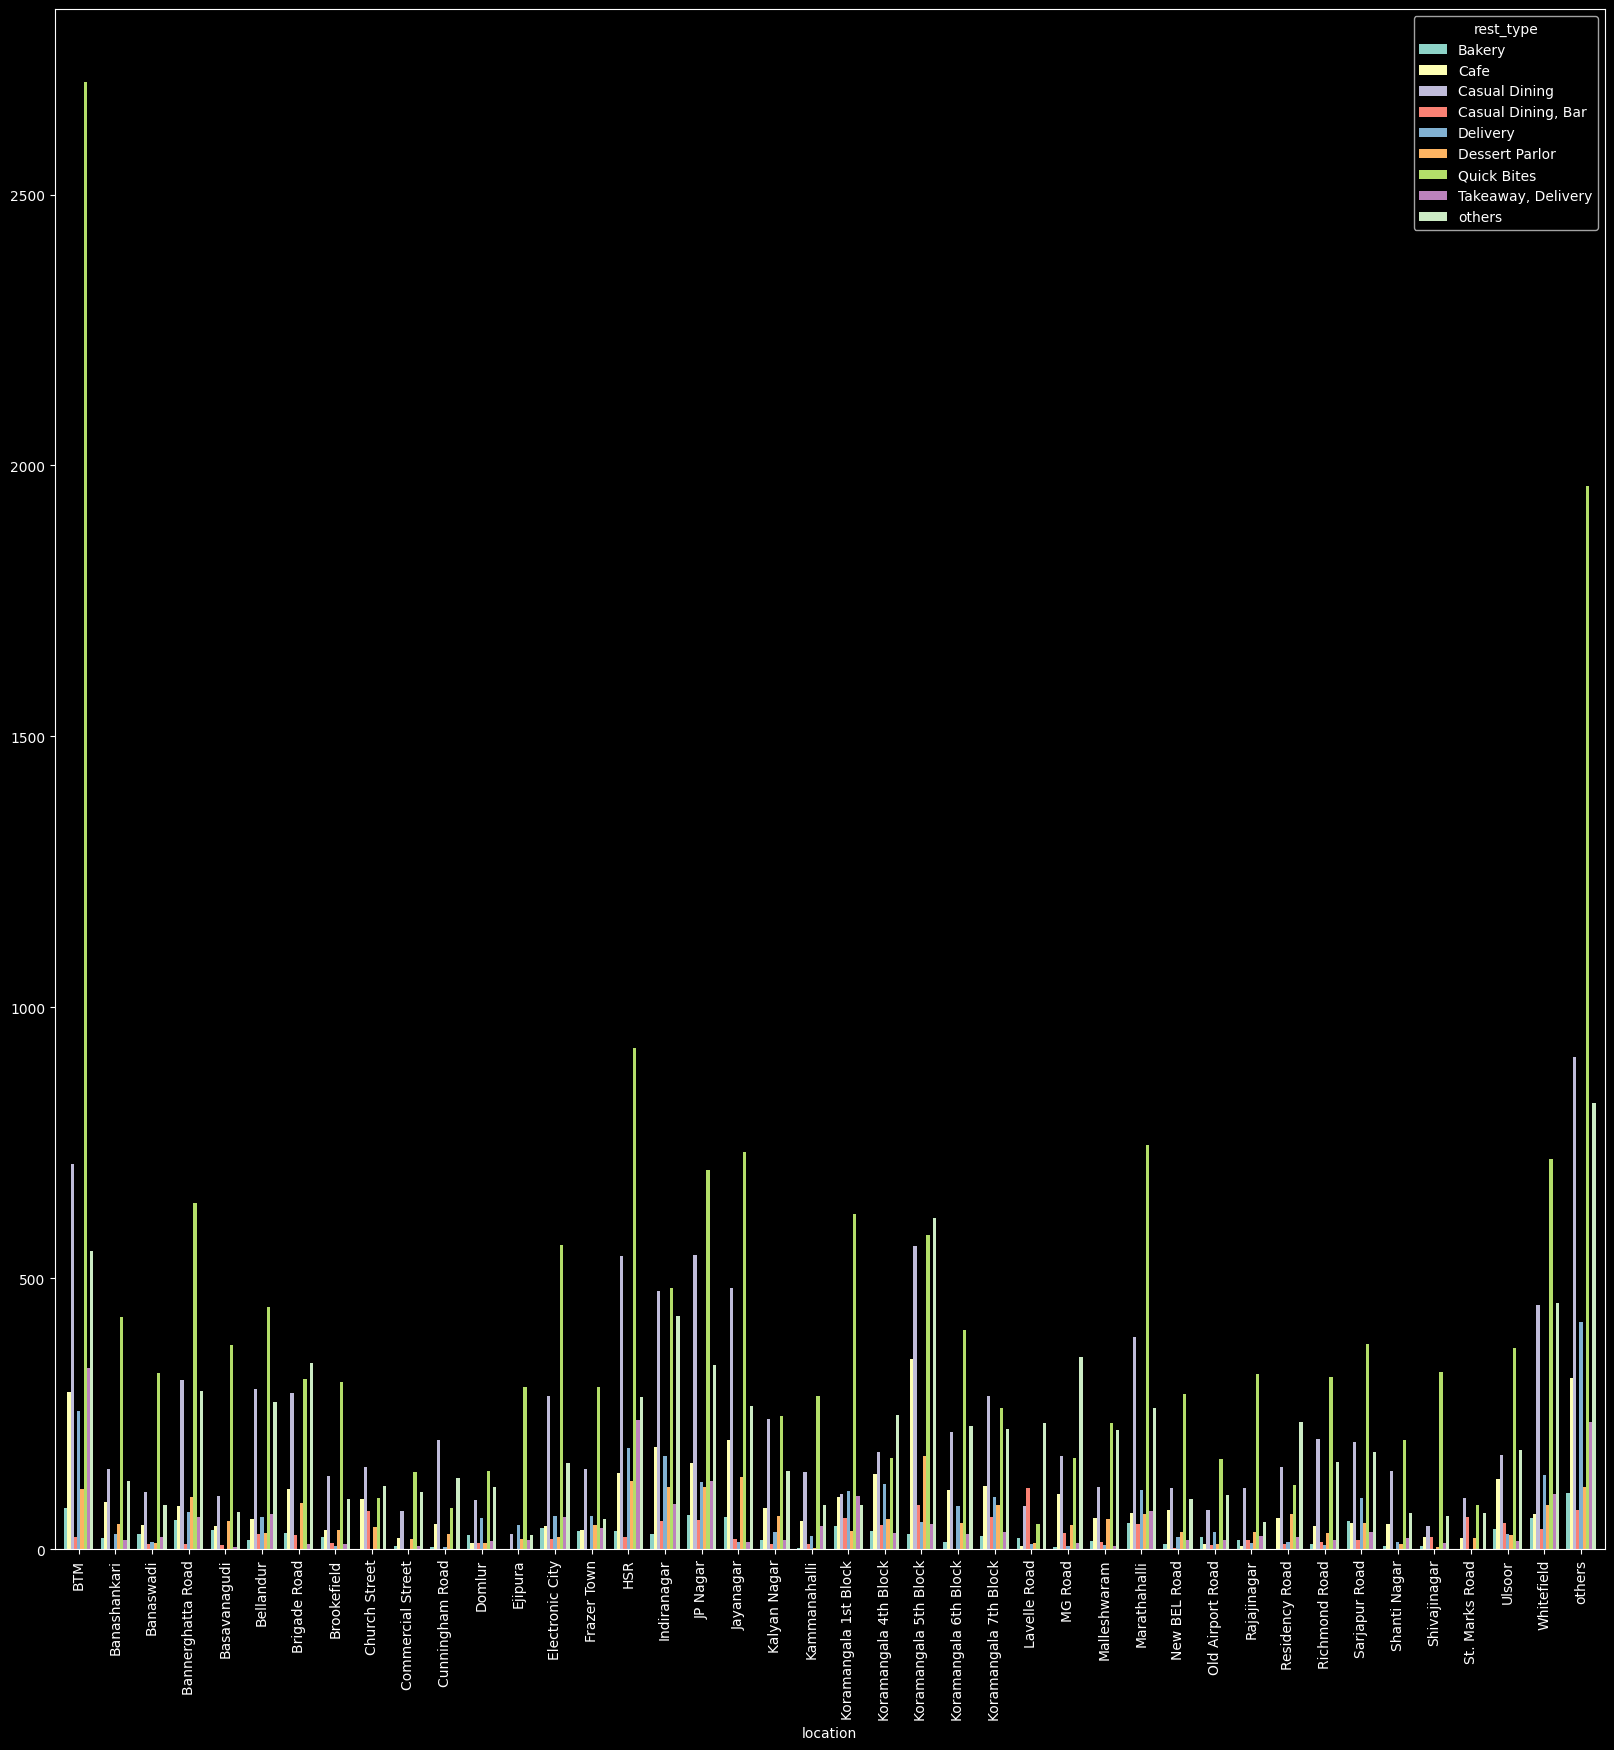

In [ ]:
df1.plot(kind='bar',figsize=(20,20),width=0.8)
plt.show()

# **Observations:**
* More no. of restaurants already present in BTM so opening in Lavelle road,St.Marks road could be profitable
* if needed to open in BTM cafe or cafe w bar is recommended



In [ ]:
df2 = df.groupby(['rate','online_order','location'])['name'].count()
df2.to_csv('df2.csv')
df2 = pd.read_csv('df2.csv')
df2 = pd.pivot_table(df2, values='name', index=['location'], columns=['online_order'], aggfunc=np.sum)
df2.head()

<ipython-input-33-d68b6685af3f>:4: FutureWarning: The provided callable <function sum at 0x7a4c8a712dd0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2, values='name', index=['location'], columns=['online_order'], aggfunc=np.sum)


online_order,No,Yes
location,,
BTM,1763,3293
Banashankari,397,505
Banaswadi,302,338
Bannerghatta Road,685,924
Basavanagudi,243,441


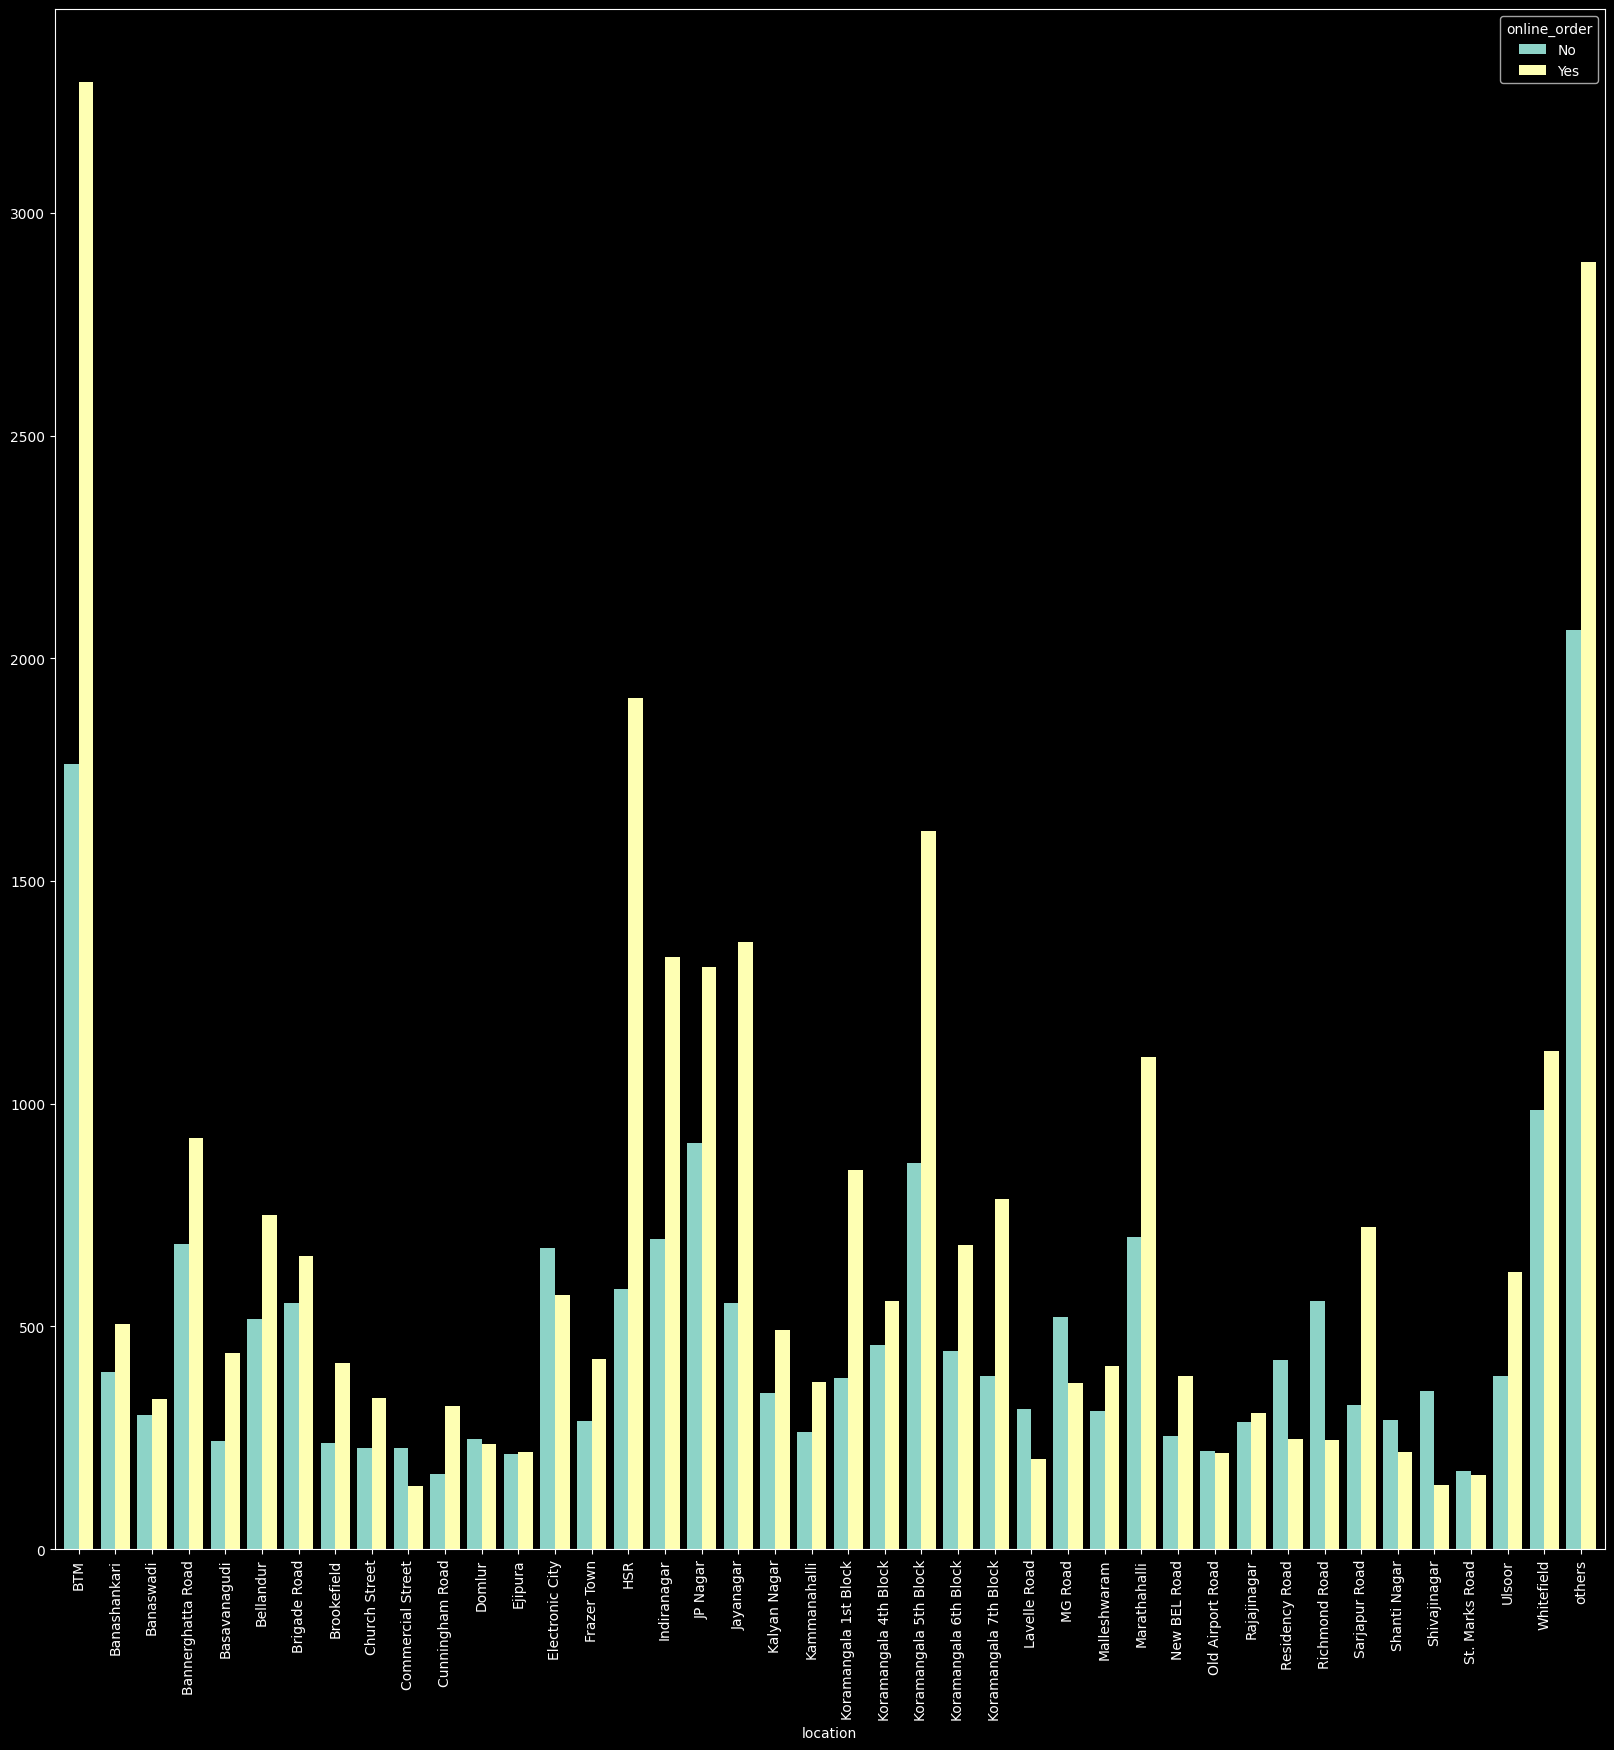

In [ ]:
df2.plot(kind='bar',figsize=(20,20),width=0.8)
plt.show()

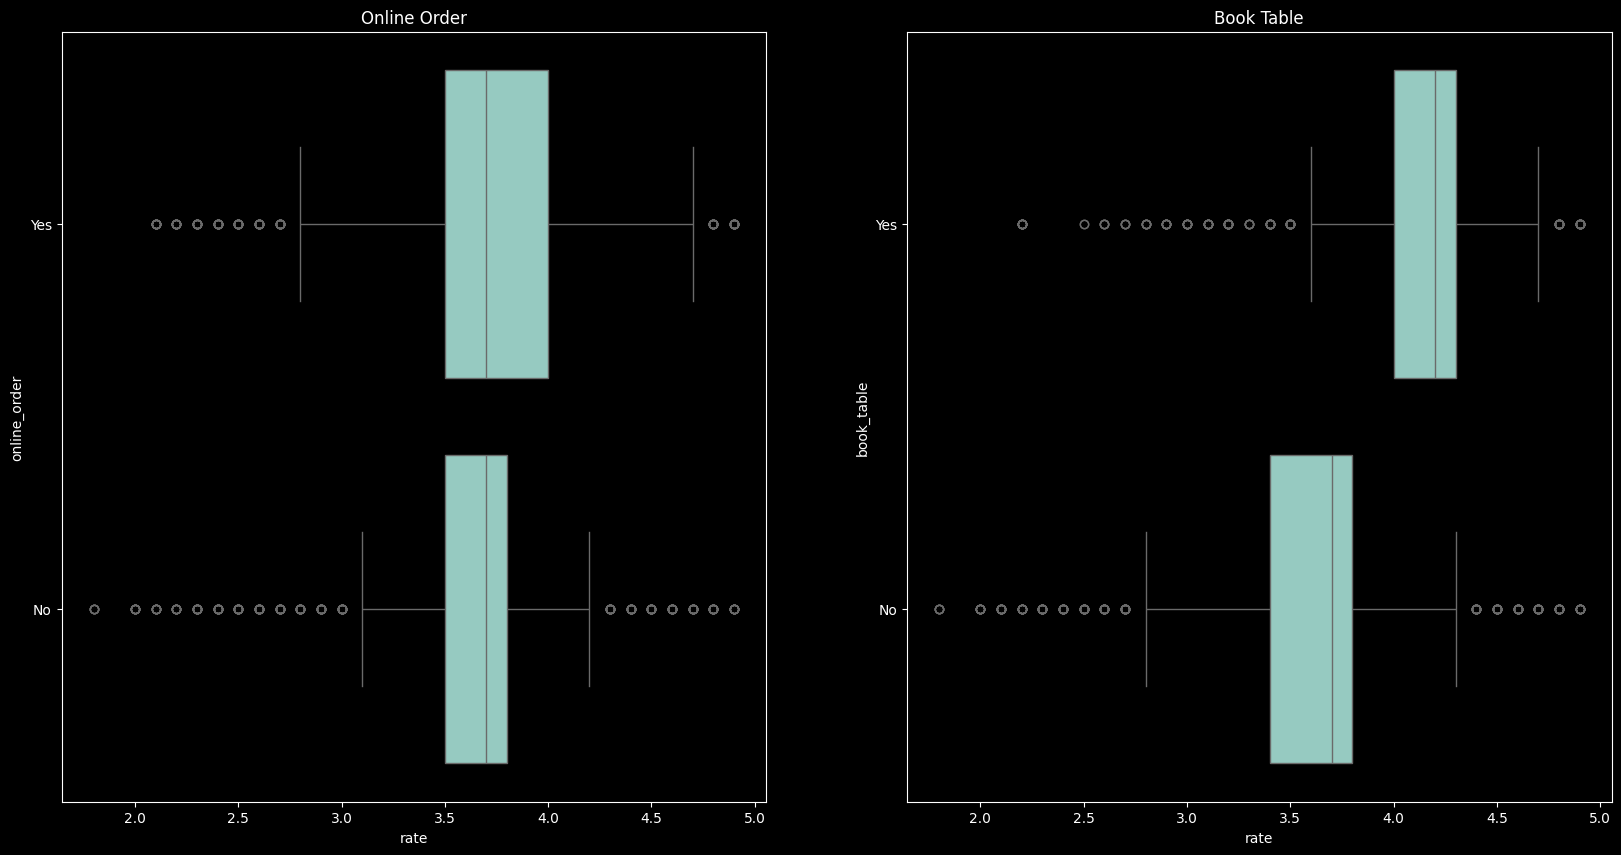

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.boxplot(x=df['rate'],y=df['online_order'],data=df,ax=ax[0])
ax[0].set_title('Online Order')
sns.boxplot(x=df['rate'],y=df['book_table'],data=df,ax=ax[1])
ax[1].set_title('Book Table')
plt.show()

<ipython-input-36-b6d76b3b54e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['type'],y=df['rate'],palette='rainbow')


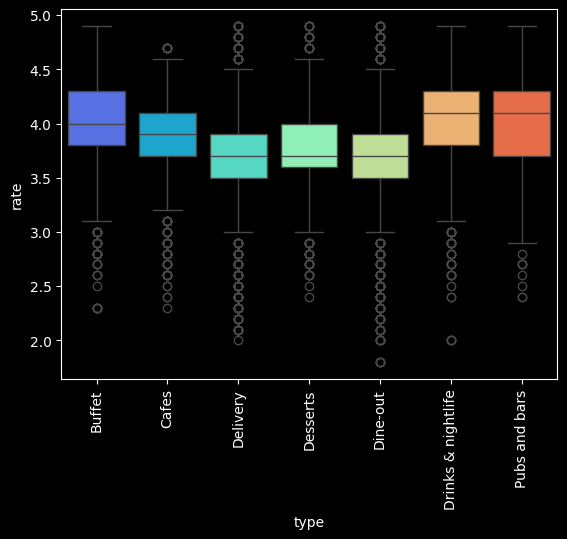

In [ ]:
sns.boxplot(x=df['type'],y=df['rate'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Votes')

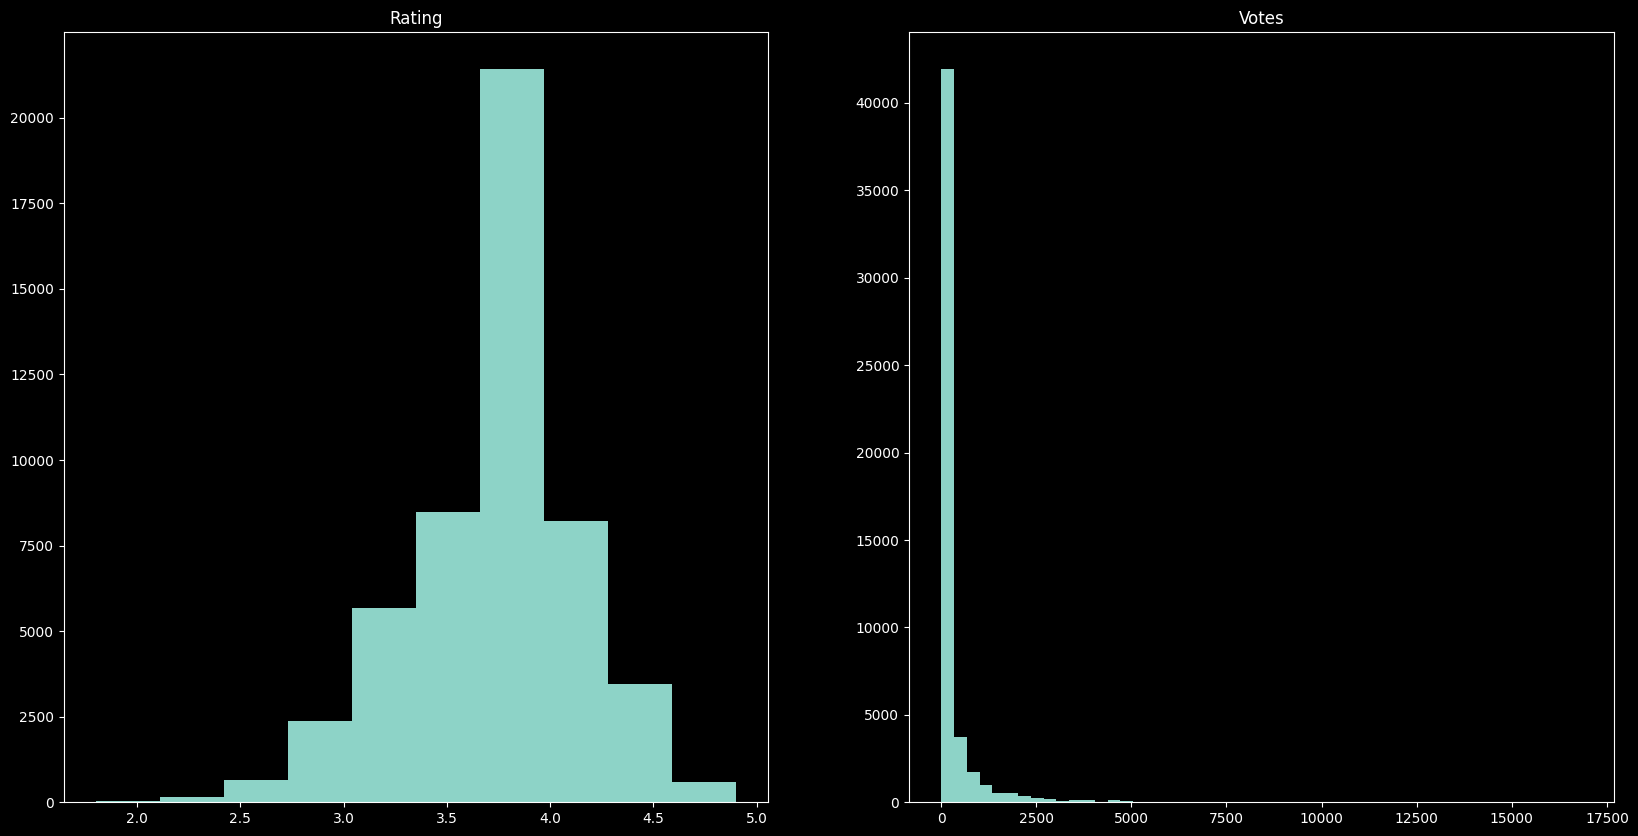

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].hist(df['rate'],bins=10)
ax[0].set_title('Rating')
ax[1].hist(df['votes'],bins=50)
ax[1].set_title('Votes')


# **Observation:**

1.   while the hotel with and without online_order has average rating score hotels with higher rating does have online_order
2.   the booktable facility is a crucial feature as it how the ratings are shifted
3. we can also say that a bar or drinks & nightlife would be a profitable bussines




<ipython-input-38-a9fe9991e373>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['price4two'],data=df,palette='rainbow')


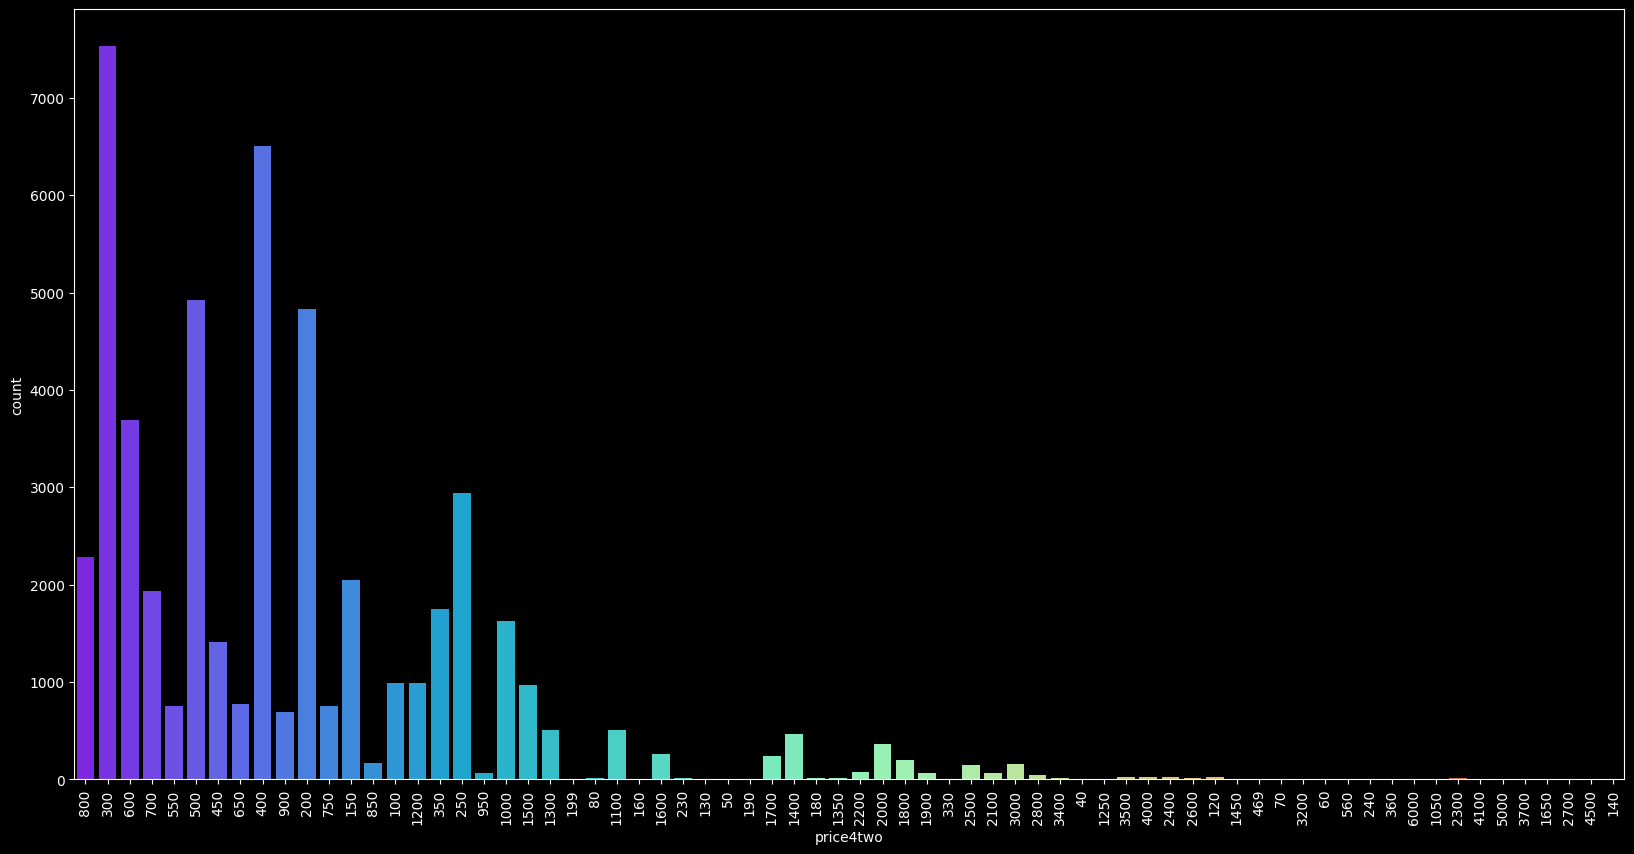

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['price4two'],data=df,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

# **Observations:**
1. More people are interested in budget restaurants i.e between 250-500
2. the company should focus on giving offers to delivery type restaurants

In [ ]:
df['type'].value_counts()

,count
type,
Delivery,25579
Dine-out,17562
Desserts,3559
Cafes,1703
Drinks & nightlife,1084
Buffet,869
Pubs and bars,686


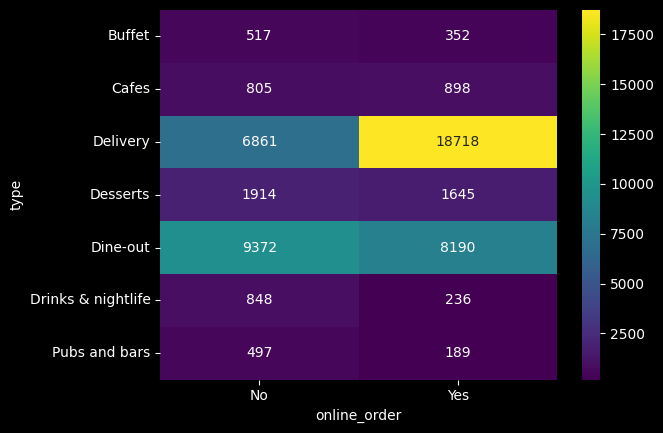

In [ ]:
sns.heatmap(df.pivot_table(index='type',columns='online_order',values='name',aggfunc='size'),annot=True,cmap='viridis',fmt='g')
plt.show()